In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sys 
sys.path.append('../Function/')
import function
from function import split_date

In [78]:
df = pd.read_excel('../../site_info_ver_3.3.xlsx')

In [106]:
dataset = df
# dataset = dataset[dataset.Site_Name=='Eilat Coral Beach']
# dataset = dataset[dataset.is_weekend==1]
# dataset = dataset.loc[dataset.year>2018]
dataset.shape
sites = dataset.Site_Name.unique()
print(sites,len(sites))

['Alexander Stream-Bet Yannai' 'Apollonia' 'Arbel' 'Avdat' 'Ayun Stream'
 'Bet Alpha' 'Bet Guvrin' 'Bet Shean' 'Bet Shearim' 'Caesarea'
 'Eilat Coral Beach' 'En Afek' 'En Avdat' 'En Gedi' 'En Prat'
 'Enot Tsukim' 'Gamla' 'Good Samaritan Museum' 'Hai Ramon'
 'Hamat Tiberias' 'Hay-Bar Yotvata' 'Hermon Stream (Banias)'
 'Herodium Park' 'Hula' 'Khan Be’erot' 'Kokhav HaYarden' 'Korazim' 'Kursi'
 'Maayan Harod' 'Makhtesh Ramon' 'Mamshit' 'Me‘arot Stream'
 'Mount Gerizim' 'Qumran Park' 'Stalactite Cave' 'Tel Arad'
 'Tel Beer Sheva' 'Tel Dan' 'Tel Hazor' 'Tel Megiddo' 'The Masada'
 'Tzipori' 'Yehiam' 'Amud Stream' 'Ashkelon National Park' 'Baram'
 'Dor HaBonim Beach' 'HaBsor(Eshkol Park)' 'Meshushim Stream'
 'Palmahim Beach' 'Snir Stream' 'Taninim Stream' 'Castel National site'
 'En Hemed' 'Yehudiya' 'The Majrase – Betiha' 'Horshat Tal'
 'Nimrod Fortress' 'Akhziv' 'Prat Stream-En Mabo‘a' 'Gan HaShlosha'
 'Baptismal Site Qasr al-Yahud'] 62


In [107]:
dataset.shape

(109108, 85)

In [108]:
dataset = split_date(dataset)

Split Data Successfully


In [109]:
dataset = pd.get_dummies(dataset)
dataset.head(1)

,Date,Israelis_Count,Tourists_Count,Total,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,...,Site_Name_Tel Arad,Site_Name_Tel Beer Sheva,Site_Name_Tel Dan,Site_Name_Tel Hazor,Site_Name_Tel Megiddo,Site_Name_The Majrase – Betiha,Site_Name_The Masada,Site_Name_Tzipori,Site_Name_Yehiam,Site_Name_Yehudiya
0,2016-01-01,7,0,7,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
drop_one_unique = [x for x in dataset.columns if len(dataset[x].value_counts())==1]
drop_one_unique

['Tel_Aviv-Yafo_so2_exceeded',
 'Jerusalem_so2_exceeded',
 'Ashkelon_so2_exceeded',
 'Beer-Sheva_so2_exceeded']

In [111]:
pollutions = ['nox','pm10','pm2.5','so2']
print(dataset[pollutions].isna().sum())
# dataset.dropna(inplace=True)
dataset.drop(pollutions,axis=1,inplace=True)

nox         20
pm10     32825
pm2.5    43812
so2       5188
dtype: int64


In [112]:


dataset.drop(drop_one_unique,axis=1,inplace=True)

corr = function.remove_high_corr(dataset.drop(['Temperature','Tourists_Count','Total'],axis=1), 'Israelis_Count', 0.4)
print(corr)
dataset.drop(corr,axis=1,inplace=True)
dataset.set_index("Date",inplace=True)
dataset.sort_index(inplace=True)

# dataset = function.remove_outliers(dataset, 'Israelis_Count')

['is_jewish_vacation', 'Jerusalem_pm10', 'Beer-Sheva_nox_exceeded', 'is_Site_exceeded_pm10', 'Beer-Sheva_pm2.5_exceeded', 'is_nationalPark', 'Beer-Sheva_pm2.5', 'is_Site_exceeded_pm2.5', 'Site_Name_Hay-Bar Yotvata', 'Beer-Sheva_pm10', 'Haifa_pm10', 'Site_Name_Hula', 'Site_Name_Apollonia', 'is_religion', 'Site_Name_Gamla', 'Site_Name_Me‘arot Stream', 'is_cave', 'Jerusalem_pm2.5', 'Tel_Aviv-Yafo_pm2.5', 'Jerusalem_pm2.5_exceeded', 'is_jewishHeritage', 'Haifa_so2_exceeded', 'Tel_Aviv-Yafo_pm10_exceeded', 'Ashkelon_nox', 'is_christiansHeritage', 'is_HeatWave', 'is_muslimsHeritage', 'Tel_Aviv-Yafo_pm10', 'Site_Name_Kokhav HaYarden', 'Season_summer', 'is_natureReserve', 'Site_Name_Arbel', 'Tel_Aviv-Yafo_pm2.5_exceeded', 'Season_autumn', 'Ashkelon_pm2.5', 'region_South', 'Site_Name_Hai Ramon', 'Site_Name_Makhtesh Ramon', 'Site_Name_En Afek', 'Site_Name_Bet Guvrin', 'Ashkelon_nox_exceeded', 'Haifa_nox', 'Jerusalem_pm10_exceeded', 'region_Judea_Samaria', 'Site_Name_Castel National site']


In [113]:
dataset.isna().sum().sum()

0

In [125]:
target_str = 'Israelis_Count'
X = dataset.drop(['Israelis_Count','Tourists_Count','Total'],axis=1)
# X = dataset[['Temperature']]
y = dataset.Israelis_Count


X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer 
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
train_target_scaler = Normalizer()
test_target_scaler = Normalizer()

X_train_scaled = train_scaler.fit_transform(X_train)
y_train_scaled = np.log([y_train.values+0.01]).T
X_test_scaled = test_scaler.fit_transform(X_test)
y_test_scaled = np.log([y_test.values+0.01]).T
print('shape X train',X_train_scaled.shape)
print('shape y train',y_train_scaled.shape)
print('shape X test',X_test_scaled.shape)
print('shape y test',y_test_scaled.shape)



shape X train (98197, 92)
shape y train (98197, 1)
shape X test (10911, 92)
shape y test (10911, 1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1293.7762533656917
1243.620145510868


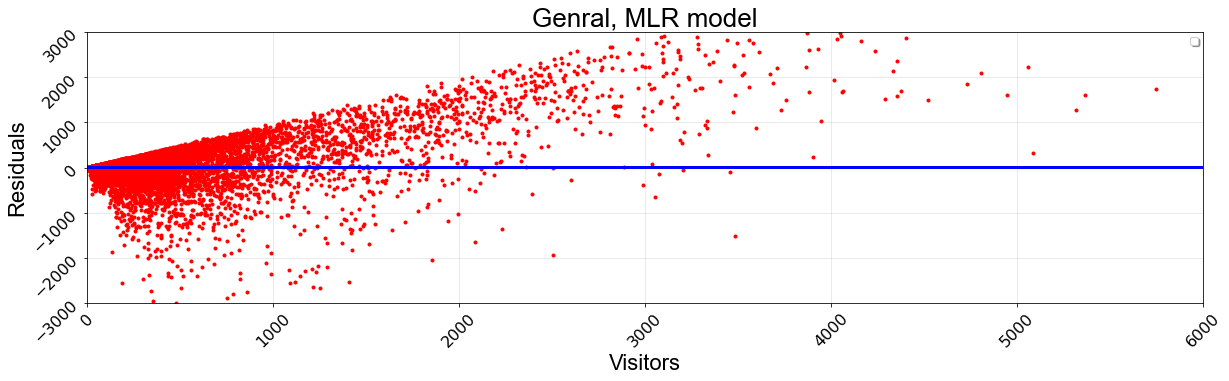

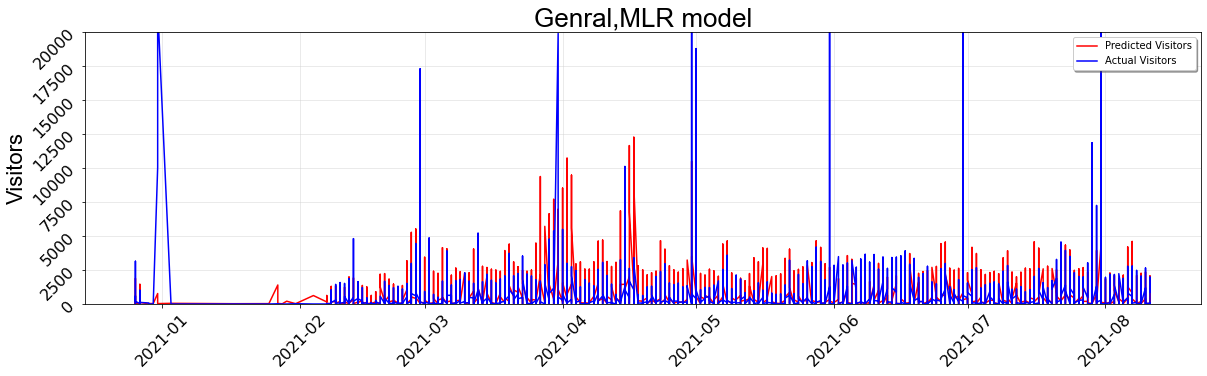

In [124]:
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train_scaled)

predicion_scaled = mlr.predict(X_test_scaled)
predicion = np.exp(predicion_scaled.T).T

predicion=predicion.reshape(predicion.shape[0])
res = pd.DataFrame(data={
    'Prediction':predicion,
    "Actual":y_test.values
}, index=y_test.index)
res =res.sort_index()

rmse = function.get_rmse(res['Prediction'], res['Actual'])
print(rmse)
std = np.std(res['Actual'])
print(std)
function.plot_residuals(res.Prediction, res.Actual,title='Genral, MLR model',fig_size_tuple=(20,5),ylim=(-3000,3000),xlim=(0,6000))
# function.plot_residuals(res.Prediction, res.Actual,title='North Sites, MLR model, Weekend',fig_size_tuple=(20,5),ylim=(-1000,1000),xlim=(0,1000))
function.plot_line(res.Prediction, res.Actual,title='Genral,MLR model',ylim=(0,20000),fig_size_tuple=(20,5))


In [117]:
coef = sorted( list(zip(mlr.coef_.T,X_train.columns)))
coef

[(array([-3.18792384e+11]), 'is_water'),
 (array([-3.13431766e+11]), 'Green_border'),
 (array([-4.1369009]), 'Site_Name_Khan Be’erot'),
 (array([-1.02464101]), 'special_activity'),
 (array([-0.95214653]), 'Site_Name_Kursi'),
 (array([-0.83813077]), 'is_archaeology'),
 (array([-0.73128438]), 'Site_Name_Tel Megiddo'),
 (array([-0.4756031]), 'Site_Name_Tzipori'),
 (array([-0.44209766]), 'Site_Name_Baram'),
 (array([-0.42850494]), 'Season_winter'),
 (array([-0.3960284]), 'Jerusalem_nox_exceeded'),
 (array([-0.36206692]), 'Haifa_nox_exceeded'),
 (array([-0.30541345]), 'Ashkelon_pm10'),
 (array([-0.28632104]), 'is_camping'),
 (array([-0.23431822]), 'Tel_Aviv-Yafo_so2'),
 (array([-0.20487492]), 'operations'),
 (array([-0.19926343]), 'Temperature'),
 (array([-0.17587852]), 'Site_Name_Tel Arad'),
 (array([-0.1618674]), 'Beer-Sheva_pm10_exceeded'),
 (array([-0.13271705]), 'Ashkelon_pm10_exceeded'),
 (array([-0.11112396]), 'Haifa_pm10_exceeded'),
 (array([-0.03495216]), 'Site_Name_Avdat'),
 (arra